# San Francisco Bay Area Bike-Sharing Data Exploration
## by Abdulmaleek Oladipo

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_trips.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# high-level overview of data shape and composition
print(bike_trips.shape)
print(bike_trips.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [5]:
# changing columns datatype to a suitable one

# convert start_time and end_time to datetime format
bike_trips['start_time'] = pd.to_datetime(bike_trips['start_time'])
bike_trips['end_time'] = pd.to_datetime(bike_trips['end_time'])

#change start_station_id and end_station_ id to object datatype
bike_trips['start_station_id'] = bike_trips.start_station_id.fillna(0)
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(int)
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(str)
bike_trips.start_station_id.replace(0, np.nan, inplace=True)

bike_trips['end_station_id'] = bike_trips.end_station_id.fillna(0)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(int)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(str)
bike_trips.end_station_id.replace(0, np.nan, inplace=True)

# bike_id to object datatype
bike_trips['bike_id'] = bike_trips['bike_id'].astype(str)

# member_birth_year to integer
bike_trips['member_birth_year'] = bike_trips.member_birth_year.fillna(0)
bike_trips['member_birth_year'] = bike_trips['member_birth_year'].astype(int)
bike_trips.member_birth_year.replace(0, np.nan, inplace=True)

# convert user_type into categorical types
user_category = pd.api.types.CategoricalDtype(categories = ['Customer','Subscriber'])
bike_trips['user_type'] = bike_trips['user_type'].astype(user_category)

In [6]:
# removing trips with no start station name and end station name
bike_trips = bike_trips[bike_trips.start_station_name.notnull()]

In [7]:
# check effect of changes made
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: category(1), datetime64[ns](2), float64(5), int64(1), objec

In [8]:
# descriptive statistics for numeric variables
bike_trips.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,174952.000000
mean,725.902017,37.771615,-122.353104,37.771820,-122.352689,1984.803135
std,1795.078654,0.098914,0.116387,0.098819,0.115961,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770407,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.287180,37.797320,-122.288665,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

There are 183215 trips in the wrangled version of the dataset with 16 features (duration_sec, start_time, end_time , start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numeric or text in nature, but the variables start_time and end_time are datetime variables and the variable user_type is categorical.

### What is/are the main feature(s) of interest in your dataset?

- I'm interested in figuring out when most trips are taken in terms of time of day or day of the week?

- How long the average trip take?

- If the two features above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that a modification of start_time and end_time are the features to determine when most trips are taken. I also think that the duration_sec is the feature to get how long an average trip will take.

## Univariate Exploration



I'll start by creating new columns for weekdays and hours from start_time

In [9]:
bike_trips['weekday'] = bike_trips['start_time'].dt.day_name()

In [10]:
bike_trips['hour'] = bike_trips.start_time.dt.hour

#### Variable 1
Looking at the Date-time Variables. Looking into weekday variable first.

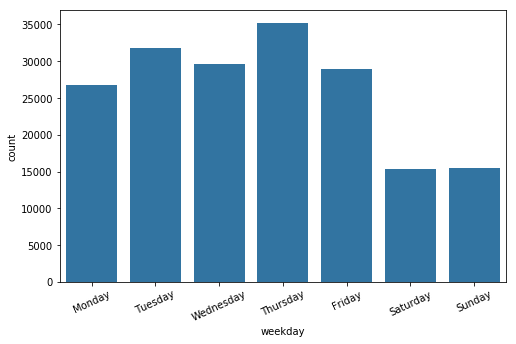

In [11]:
# a barplot of counts of trips on each day
plt.figure(figsize = [8,5])

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data=bike_trips, x='weekday', order = weekdays, color=base_color)
plt.xticks(rotation=25)

plt.show()

Most trips were taken on Thursdays while Saturday and Sunday are the Days of the week with the least number of trips taken

#### Variable 2
Going next to the hour variable

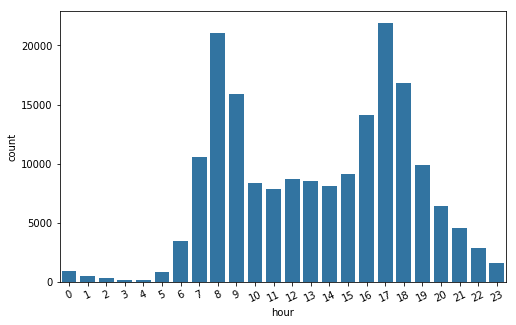

In [12]:
# a bar plot of the count of trips on each time of the day
plt.figure(figsize = [8,5])

base_color = sb.color_palette()[0]
sb.countplot(data=bike_trips, x='hour', color=base_color)
plt.xticks(rotation=25)

plt.show()

The plot seems to be bimodal, with one peak at 8 and the other at 17. This implies that the bike are mostly used when people are going to their place of work (around 8am) or leaving work to go home (around 5pm). 1,2,3,4 have extremely low values, which is reasonably so because they are the dead of the night when people hardly commute.

#### Variable 3
Next, I'll look at the distribution of Duration

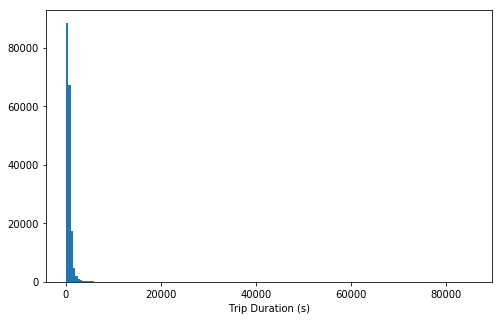

In [13]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, bike_trips['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_sec', bins=bins)
plt.xlabel('Trip Duration (s)')
plt.show()

There's a very long tail of Trip Duration. <br>
Below, I've focused on Trips of duration 3000 seconds or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.

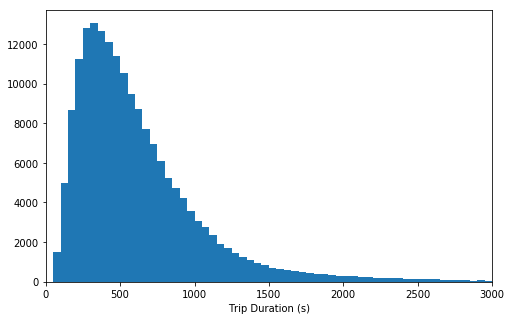

In [14]:
# adjusting the max x limit and reducing bin size
binsize = 50
bins = np.arange(0, bike_trips['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_sec', bins=bins)
plt.xlim((0,3000))
plt.xlabel('Trip Duration (s)')
plt.show()

There's a long tail in the distribution, putting it on a log scale instead

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


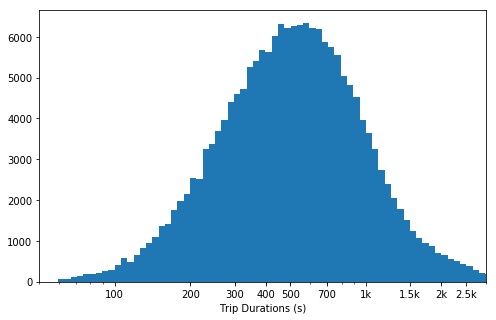

In [15]:
# log scale plot of trip duration
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike_trips['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100,200,300,400, 500,700, 1e3, 1.5e3, 2e3, 2.5e3,], ['100','200','300','400','500','700', '1k','1.5k', '2k', '2.5k'])
plt.xlim((0,3000))
plt.xlabel('Trip Durations (s)')
plt.show()

Duration has a long-tailed distribution, with a lot of trips on the short duration end, and few on the long duration end. When plotted on a log-scale, the trip duration distribution looks unimodal, with the peak between 400secs and 700secs. Interestingly, there's a smooth ramp up before the peak and a smooth ramp down after the peak.

#### Variable 4
Next up, the variable of interest is start_station_name.

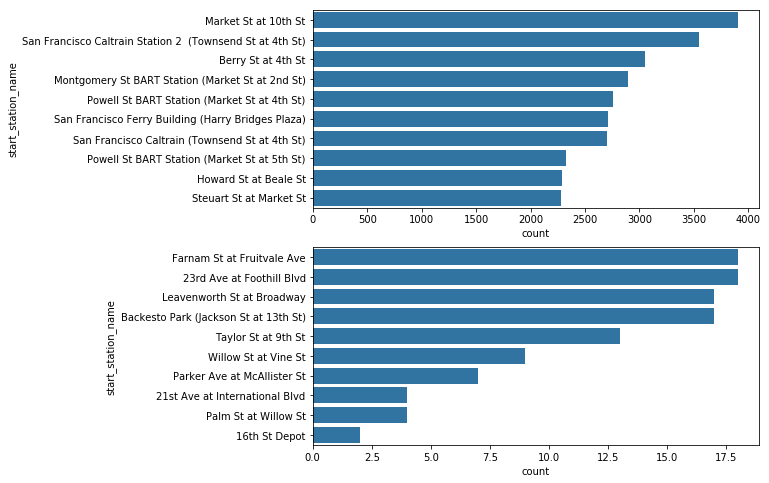

In [16]:
# ploting top 10 and bottom 10 of trips start_station_name together.

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
top_start_station_order = bike_trips.start_station_name.value_counts().head(10).index
sb.countplot(data=bike_trips, y='start_station_name', color=base_color, order=top_start_station_order, ax=ax[0])
bottom_start_station_order = bike_trips.start_station_name.value_counts().tail(10).index
sb.countplot(data=bike_trips, y='start_station_name', color=base_color, order=bottom_start_station_order, ax=ax[1])

plt.show()

Most bike trips started from _Market St at 10th St_ and the least number of bike trips started from _16th St Depot_.

#### Variable 5
Moving next to the end_station_name variable

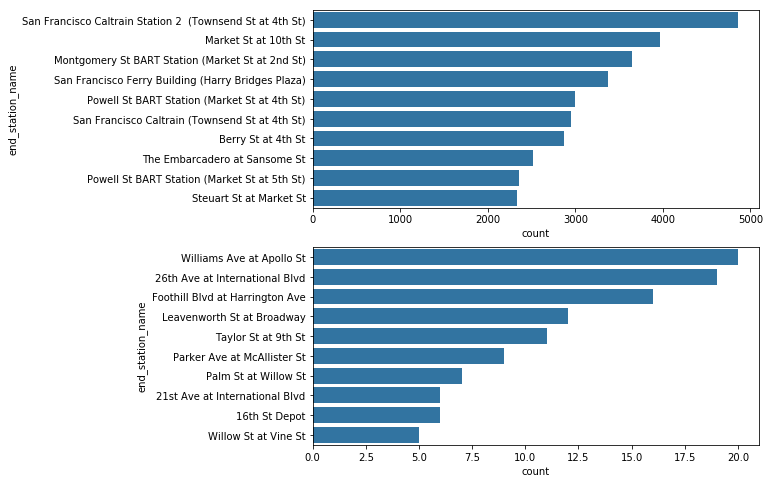

In [17]:
# ploting top 10 and bottom 10 of trips end_station_name together.

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
top_end_station_order = bike_trips.end_station_name.value_counts().head(10).index
sb.countplot(data=bike_trips, y='end_station_name', color=base_color, order=top_end_station_order, ax=ax[0])
bottom_end_station_order = bike_trips.end_station_name.value_counts().tail(10).index
sb.countplot(data=bike_trips, y='end_station_name', color=base_color, order=bottom_end_station_order, ax=ax[1])

plt.show()

Most bike trips ended at _San Francisco Caltrain Station 2 (Townsend St at 4th St)_ and the least number of bike trips ended at _Willow St at Vine St_.

#### Variable 6
Moving to bike id to know bikes with most trips and bikes with fewer trips

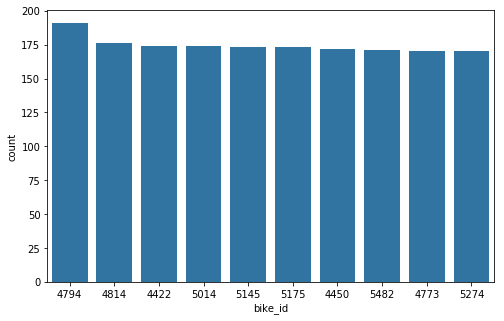

In [18]:
# ploting top 10 of bike used for trips.

plt.figure(figsize = [8,5])

base_color = sb.color_palette()[0]
top_bike_id_order = bike_trips.bike_id.value_counts().head(10).index
sb.countplot(data=bike_trips, x='bike_id', color=base_color, order=top_bike_id_order)

plt.show()

The bike with bike_id _4794_ was used the most for trips. 83 bikes were used just once for a trip, making them the bikes used the least for trips

#### Variable 7
Looking at the user-type variable next

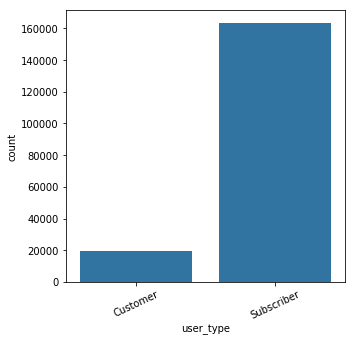

In [19]:
# a barplot of trips taken by different user types on each day
plt.figure(figsize = [5,5])

base_color = sb.color_palette()[0]
sb.countplot(data=bike_trips, x='user_type', color=base_color)
plt.xticks(rotation=25)

plt.show()

Bike Trips are hugely taken by subscribers of the san francisco bay area bike sharing system.

#### Variable 8
Looking at the member-gender variable

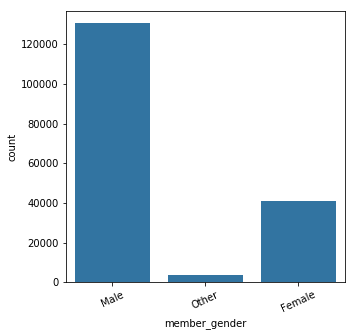

In [20]:
# a barplot of trips taken by different user types on each day
plt.figure(figsize = [5,5])

base_color = sb.color_palette()[0]
sb.countplot(data=bike_trips, x='member_gender', color=base_color)
plt.xticks(rotation=25)

plt.show()

Bike Trips are hugely taken by males in san francisco bay area.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform and also limiting the duration to 3000s or less. Under the Scaling and transformation, the data looked uniimodal, with the peak between 400sec and 700sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In order to plot univariate daily and hourly bike trips plot, I created new columns for weekdays and hours from the start time column.

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Bivariate 1
To start off with, I want to look at the correlations present between weekday and duration.

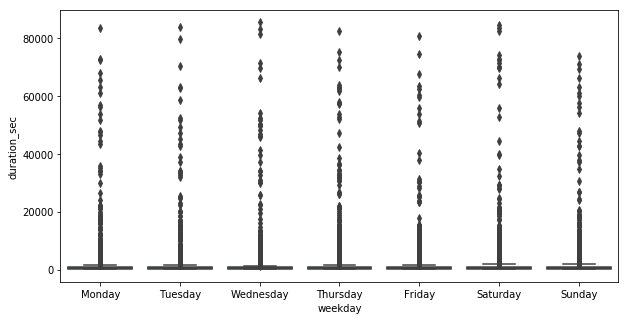

In [22]:
plt.figure(figsize = [10,5])
sb.boxplot(data=bike_trips, x='weekday', y='duration_sec', color=base_color, order = weekdays)
plt.show()

There is too much noise in the plot above. No insights can be derived from such a plot

The y axis will be adjusted to a limit of (0,2000)secs to derive insights

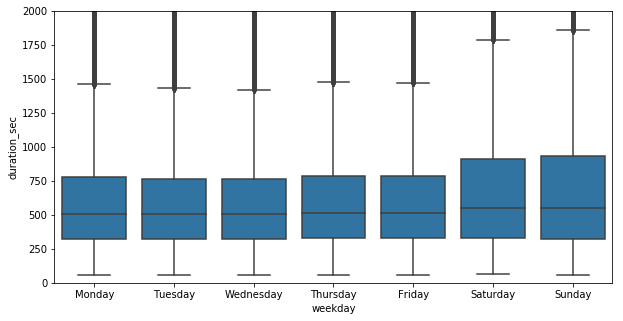

In [23]:
plt.figure(figsize = [10,5])
sb.boxplot(data=bike_trips, x='weekday', y='duration_sec', color=base_color, order=weekdays)
plt.ylim(0,2000)
plt.show()

It could be seen from the plot above that most of the weekdays have the same duration summary and the whiskers are slightly more compact, except for Saturday and Sunday which have different interquartile range (larger than the others) and their top whiskers are a bit longer. This implies that the other weekdays have more consistent trip duration than Saturday and Sundays, which have trips that took extremely long duration.

#### Bivariate 2
Next is looking at the relationship between hour of the day and trip duration

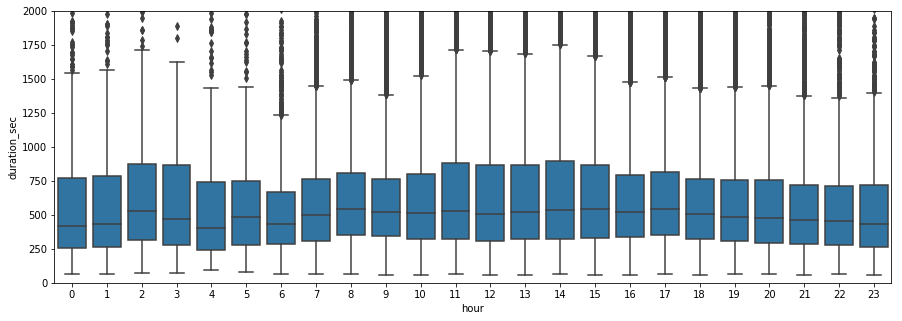

In [24]:
# ploting a box plot of hour of the day and trip duration
plt.figure(figsize = [15,5])
sb.boxplot(data=bike_trips, x='hour', y='duration_sec', color=base_color)
plt.ylim(0,2000) #setting a limit on the y axis to reduce noise
plt.show()

There is no significant insight from this plot. Just that 6am has the most compact plot

#### Bivariate 3
Next, Finding out relationship between weekday and user type

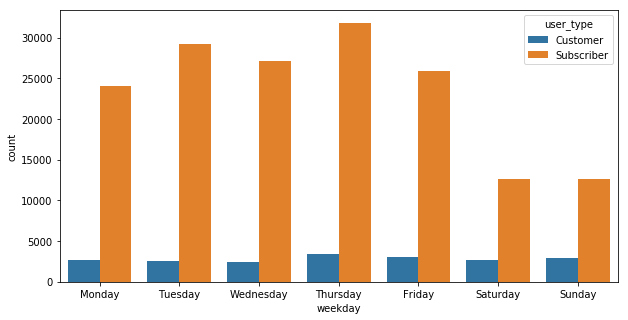

In [27]:
# ploting a stacked bar chart of weekday and usertype
plt.figure(figsize = [10,5])
sb.countplot(data=bike_trips, x='weekday', hue='user_type', order=weekdays)
plt.show()

It can be observed that the number of trips made by customers across various weekdays is almost the same thing. But the number of trips made by subscriber follow the order from the univariate plot of weekdays

#### Bivariate 4
Finally, Finding out relationship between hour of the day and user type

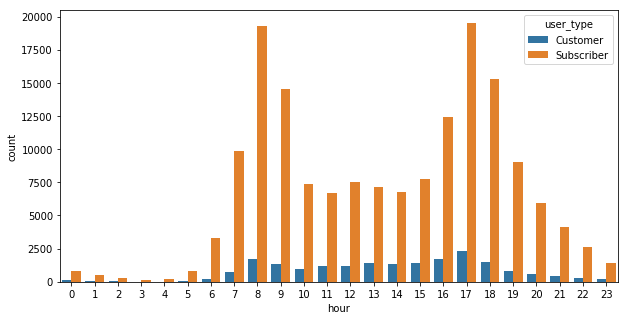

In [29]:
# ploting a stacked bar chart of hour and usertype
plt.figure(figsize = [10,5])
sb.countplot(data=bike_trips, x='hour', hue='user_type')
plt.show()

It can be seen that user type has no effect on the number of trips taken across the different hour of the day. Both Customer and Subscriber follow the same pattern as the univariate plot of hour.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Most of the weekdays have the same trip duration summary and the whiskers are slightly more compact, except for Saturday and Sunday which have different interquartile range (larger than the others) and their top whiskers are a bit longer. This implies that the other weekdays have more consistent trip duration than Saturday and Sundays, which have trips that took extremely long duration.

## Multivariate Exploration


The main thing I want to explore in this part of the analysis is how user type afffect trip duration across each day of the week.

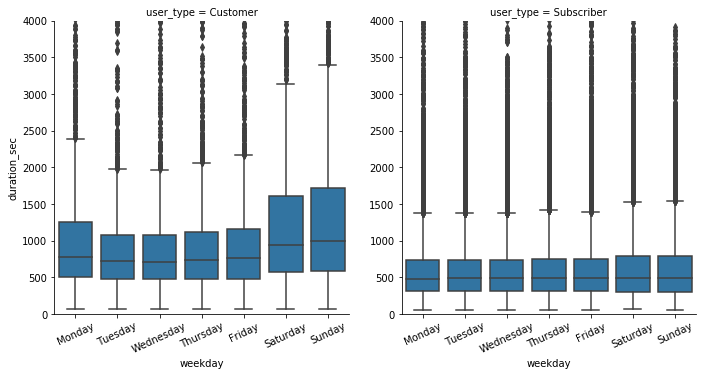

In [49]:
g=sb.FacetGrid(data=bike_trips, col='user_type', size=5)
g.map(sb.boxplot, 'weekday', 'duration_sec', order=weekdays)
plt.ylim(0,4000)
g.set_xticklabels(rotation=25) #to rotate all xticks

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of trip duration against weekday in this section by looking at the impact of user type. The multivariate exploration here showed that user type doesn't have effect on trip durations for each weekday.

## Conclusions

Before exploring, I carried out preliminary wrangling to extract days of the week and hours of the day (which are features that would be required throughout the analysis) from start_time.

In the exploration, I found out that Thursday is the day of the week with most trips while 8am and 5pm are the time of the day bikes are mostly used.

I also discovered that duration has a long-tailed distribution, with a lot of trips on the short duration end, and few on the long duration end. When plotted on a log-scale, the trip duration distribution looks unimodal, with the peak between 400secs and 700secs. Interestingly, there's a smooth ramp up before the peak and a smooth ramp down after the peak.

Most of the bike users are subscribers, with just few customers. The bikes were mostly used for trips by males.

While also exploring, I also noticed that user type doesn't have effect on bike trips across each weekday.
